<a href="https://colab.research.google.com/github/Math-Git-05/PRACTICAS-VC/blob/main/VC_PRACTICA_DE_MANIPULACON_DE_IMAGEN_20240520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LIBRERIAS***

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# ***Visualizacion de figuras***

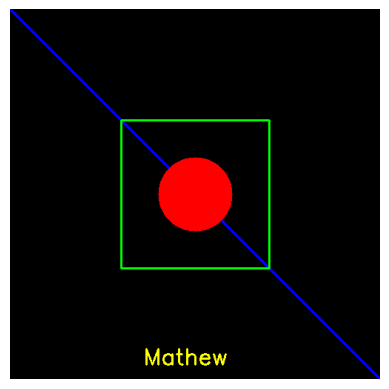

True

In [3]:

# Crear una imagen
width, height = 500, 500
imagen = np.zeros((width, height, 3), dtype=np.uint8)

# Dibujar una línea azul desde la esquina superior izquierda a la inferior derecha
cv.line(imagen, (0, 0), (width, height), (255, 0, 0), 2)

# Dibujar un rectángulo verde en el centro
rect_x, rect_y, rect_w, rect_h = 150, 150, 200, 200
cv.rectangle(imagen, (rect_x, rect_y), (rect_x + rect_w, rect_y + rect_h), (0, 255, 0), 2)

# Dibujar un círculo rojo dentro del rectángulo
cv.circle(imagen, (rect_x + rect_w // 2, rect_y + rect_h // 2), 50, (0, 0, 255), -1)

# Agregar texto amarillo con tu nombre
cv.putText(imagen, "Mathew", (180, 480), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

plt.imshow(cv.cvtColor(imagen, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Guardar la imagen
cv.imwrite("Prueba.png", imagen)


# ***Manipulacion de imagenes***

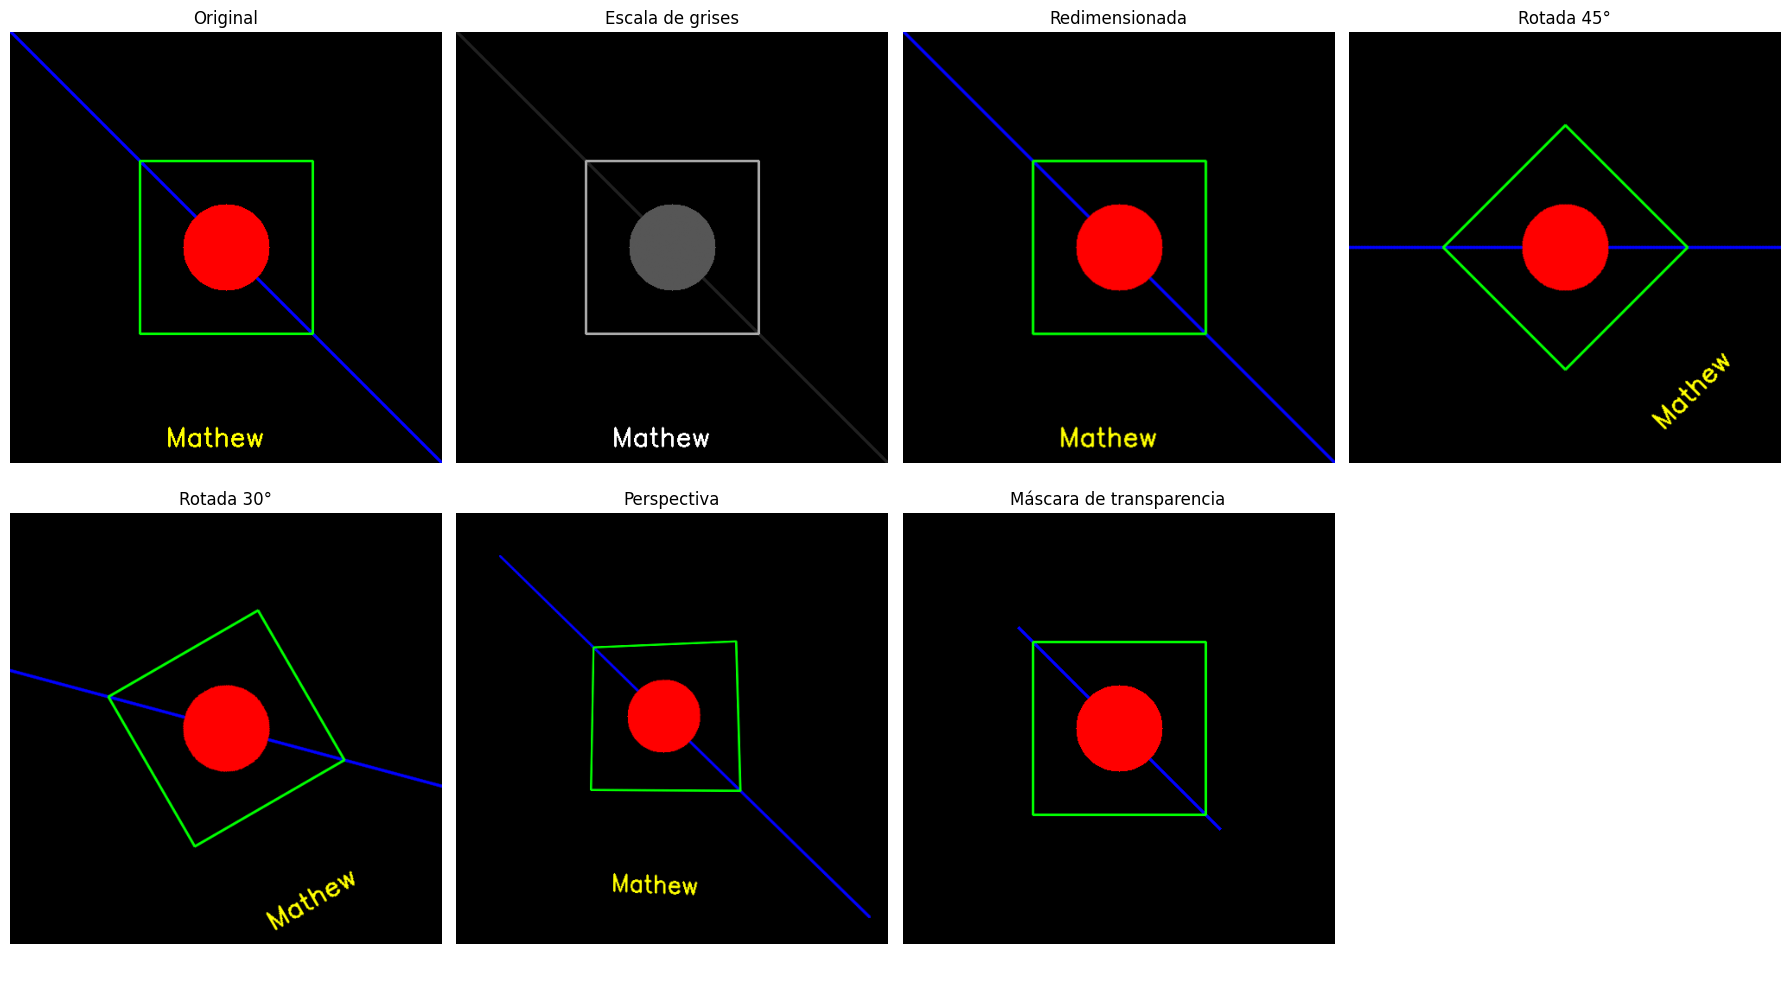

True

In [4]:
# Convertir a escala de grises
Imagengri = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# Redimensionar al doble de su tamaño
imagen_redimensionada = cv.resize(imagen, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)

# Rotar la imagen 45 grados
(h, w) = imagen.shape[:2]
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, 45, 1.0)
imagen_rotada_45 = cv.warpAffine(imagen, M, (w, h))

# Rotar la imagen 30 grados
M30 = cv.getRotationMatrix2D(center, 30, 1.0)
imagen_rotada_30 = cv.warpAffine(imagen, M30, (w, h))

#Transformación de perspectiva (imagen vista desde un ángulo)
pts1 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
pts2 = np.float32([[50, 50], [w-50, 20], [30, h-50], [w-20, h-30]])
M_perspective = cv.getPerspectiveTransform(pts1, pts2)
imagen_perspectiva = cv.warpPerspective(imagen, M_perspective, (w, h))


# Máscara de transparencia (oculta todo menos un área circular)
mask = np.zeros((h, w), dtype=np.uint8)
cv.circle(mask, (w//2, h//2), min(w, h)//3, (255), thickness=-1)  # Círculo central
masked_image = cv.bitwise_and(imagen, imagen, mask=mask)


# Crear la figura con subgráficos
fig, axs = plt.subplots(2, 4, figsize=(18, 10))

# Mostrar las imágenes
axs[0, 0].imshow(cv.cvtColor(imagen, cv.COLOR_BGR2RGB))
axs[0, 0].set_title("Original")

axs[0, 1].imshow(Imagengri, cmap="gray")
axs[0, 1].set_title("Escala de grises")

axs[0, 2].imshow(cv.cvtColor(imagen_redimensionada, cv.COLOR_BGR2RGB))
axs[0, 2].set_title("Redimensionada")

axs[0, 3].imshow(cv.cvtColor(imagen_rotada_45, cv.COLOR_BGR2RGB))
axs[0, 3].set_title("Rotada 45°")

axs[1, 0].imshow(cv.cvtColor(imagen_rotada_30, cv.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotada 30°")

axs[1, 1].imshow(cv.cvtColor(imagen_perspectiva, cv.COLOR_BGR2RGB))
axs[1, 1].set_title("Perspectiva")

axs[1, 2].imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
axs[1, 2].set_title("Máscara de transparencia")

# Ocultar ejes
for ax in axs.flat:
  ax.axis("off")

plt.tight_layout()
plt.show()

#Guardar todas las imagenes
cv.imwrite("Original.png", imagen)
cv.imwrite("grayscale.png", Imagengri)
cv.imwrite("Resized.png", imagen_redimensionada)
cv.imwrite("Rotated_30.png", imagen_rotada_30)
cv.imwrite("Rotated_45.png", imagen_rotada_45)
cv.imwrite("Perspctive.png", imagen_perspectiva)
cv.imwrite("Masked.png", masked_image)